In [1]:
import pandas as pd #for tasks related to data : import, export, manipulation
import numpy as np #for numerical tasks
import matplotlib.pyplot as plt #for data visualization
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
  df = pd.read_csv('C:/Users/Home/Downloads/Housing.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [7]:
 print("\nMissing values per column:")
 print(df.isnull().sum())


Missing values per column:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [8]:
print(f"Shape: {df.shape}")

Shape: (545, 13)


In [10]:
#Split Data into Train-Test Sets
# Define the features (X) and the target (y)
# For this example, We will use 'area' as the single feature.
X = df[['area']]
y = df['price']

# Split the data into training and testing sets (80% train, 20% test)
# random_state ensures reproducibility of the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split successfully!")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data split successfully!
Shape of X_train: (436, 1)
Shape of X_test: (109, 1)
Shape of y_train: (436,)
Shape of y_test: (109,)


In [11]:
#Fit a Linear Regression Model 
# Create a Linear Regression model instance
model = LinearRegression()
# Fit (train) the model on the training data
model.fit(X_train, y_train)
print("Linear Regression model trained successfully!")

Linear Regression model trained successfully!


In [12]:
#Evaluating Model Performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model Evaluation:
Mean Absolute Error (MAE): 1474748.13
Mean Squared Error (MSE): 3675286604768.19
Root Mean Squared Error (RMSE): 1917103.70
R-squared (R²): 0.27


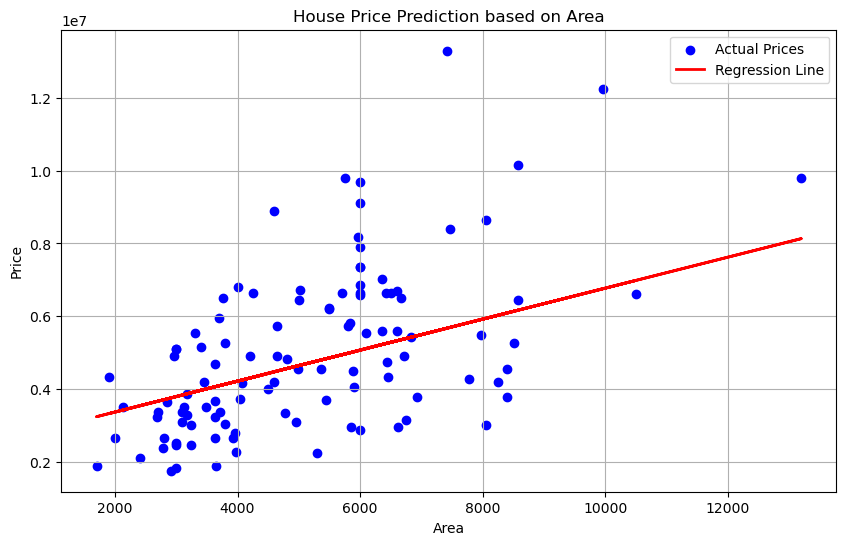


Model Coefficients:
Intercept: 2512254.26
Coefficient for Area: 425.73

Interpretation:
For every one-unit increase in 'Area', the predicted 'Price' increases by 425.73.


In [13]:
#Plot the Regression Line and Interpret Coefficients
import matplotlib.pyplot as plt

# Plotting the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('House Price Prediction based on Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Interpret the coefficients
print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for Area: {model.coef_[0]:.2f}")

# Interpretation of the coefficient
print("\nInterpretation:")
print(f"For every one-unit increase in 'Area', the predicted 'Price' increases by {model.coef_[0]:.2f}.")

In [ ]:
#Multiple Linear Regression

In [14]:
# Select multiple features (X) and the target (y)
features = ['area', 'bedrooms', 'bathrooms']
X_multi = df[features]
y_multi = df['price']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

print("Data split successfully with multiple features!")
print(f"Shape of X_train (multi-feature): {X_train_multi.shape}")
print(f"Shape of X_test (multi-feature): {X_test_multi.shape}")

Data split successfully with multiple features!
Shape of X_train (multi-feature): (436, 3)
Shape of X_test (multi-feature): (109, 3)


In [16]:
from sklearn.linear_model import LinearRegression

# Creating a Linear Regression model instance
model_multi = LinearRegression()

# Fit (train) the model on the training data with multiple features
model_multi.fit(X_train_multi, y_train_multi)

print("Multiple Linear Regression model trained successfully!")

Multiple Linear Regression model trained successfully!


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Making predictions on the test set
y_pred_multi = model_multi.predict(X_test_multi)

# Calculating the evaluation metrics
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("Multiple Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_multi:.2f}")
print(f"Mean Squared Error (MSE): {mse_multi:.2f}")
print(f"R-squared (R²): {r2_multi:.2f}")

Multiple Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 1265275.67
Mean Squared Error (MSE): 2750040479309.05
R-squared (R²): 0.46


In [18]:
# Interpreting the coefficients
print("Multiple Linear Regression Coefficients:")
print(f"Intercept: {model_multi.intercept_:.2f}")

# Pairing the feature names with their coefficients
feature_names = X_train_multi.columns
coefficients = model_multi.coef_

for feature, coef in zip(feature_names, coefficients):
    print(f"Coefficient for {feature}: {coef:.2f}")

# Interpretation of the coefficients
print("\nInterpretation:")
print(f"For every one-unit increase in 'area', the predicted 'price' increases by {coefficients[0]:.2f}, holding all other features constant.")
print(f"For every one-unit increase in 'bedrooms', the predicted 'price' increases by {coefficients[1]:.2f}, holding all other features constant.")
print(f"For every one-unit increase in 'bathrooms', the predicted 'price' increases by {coefficients[2]:.2f}, holding all other features constant.")

Multiple Linear Regression Coefficients:
Intercept: 59485.38
Coefficient for area: 345.47
Coefficient for bedrooms: 360197.65
Coefficient for bathrooms: 1422319.66

Interpretation:
For every one-unit increase in 'area', the predicted 'price' increases by 345.47, holding all other features constant.
For every one-unit increase in 'bedrooms', the predicted 'price' increases by 360197.65, holding all other features constant.
For every one-unit increase in 'bathrooms', the predicted 'price' increases by 1422319.66, holding all other features constant.
